<a href="https://colab.research.google.com/github/BhekiMabheka/Data_Driven_Competions/blob/master/generic_start_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Richter's Predictor: Modeling Earthquake Damage
Can you predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal based on aspects of building location and construction?

We're trying to predict the ordinal variable damage_grade, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:

1 represents low damage
2 represents a medium amount of damage
3 represents almost complete destruction

In [18]:
!pip install -Uqq xgboost

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import accuracy_score
pd.set_option('display.max_columns', None)

In [3]:
train_values = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/zindi_competetions/fast_ai_start_up_notebook/data/train_values.csv")
train_labels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/zindi_competetions/fast_ai_start_up_notebook/data/train_labels.csv")
test_data    = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/zindi_competetions/fast_ai_start_up_notebook/data/test_values.csv")

In [4]:
train_data = pd.merge(left = train_values,
                      left_on = "building_id",
                      right = train_labels,
                      right_on = "building_id")
train_data.sample(3)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
176047,1036701,10,804,1371,2,15,3,5,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
32602,351935,10,218,7209,1,75,5,2,t,r,n,f,j,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
221652,32583,21,499,1111,2,15,12,4,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,0,1,1,0,0,0,0,0,0,0,0,0,2


In [5]:
test_data.sample(3)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
58707,1022620,26,39,10795,2,25,38,7,t,u,x,v,s,t,d,0,0,0,0,0,1,0,0,1,0,0,v,1,1,0,0,1,0,0,0,0,0,0,0
65988,180668,26,36,11076,1,0,10,4,n,r,x,v,j,s,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
31633,845234,8,638,11683,2,25,9,6,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


## Data Preprocessing

In [6]:
def preprocess_data(data):

    # Impute missing values for numeric features with the median
    numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
    data[numeric_features] = data[numeric_features].fillna(data[numeric_features].median())

    # Impute missing values for categorical features with the mode
    categorical_features = data.select_dtypes(include=['object']).columns
    data[categorical_features] = data[categorical_features].fillna(data[categorical_features].mode().iloc[0])

    # Convert categorical features to numerical using one-hot encoding
    data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

    return data

# Invoke the function
train_data = preprocess_data(train_data)
test_data  = preprocess_data(test_data)

In [7]:
train_data.sample(4)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,land_surface_condition_o,land_surface_condition_t,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_q,roof_type_x,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_o,position_s,position_t,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
137803,109675,26,762,10530,2,10,10,7,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
157000,506602,10,1127,1095,2,10,11,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
241113,516732,30,237,923,2,30,14,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
239382,869120,7,1421,55,2,50,5,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0


In [8]:
test_data.sample(3)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_o,land_surface_condition_t,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_q,roof_type_x,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_o,position_s,position_t,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
27445,220497,0,1031,8133,2,15,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
19626,566881,21,819,1079,3,5,6,6,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
52459,338255,8,1046,10237,2,25,3,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0


In [9]:
X = train_data.drop(['building_id', 'damage_grade'], axis=1)
y = train_data['damage_grade']

In [10]:
# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

Random Forest - Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.47      0.55      5170
           2       0.72      0.83      0.77     29487
           3       0.72      0.60      0.65     17464

    accuracy                           0.72     52121
   macro avg       0.70      0.63      0.66     52121
weighted avg       0.71      0.72      0.71     52121



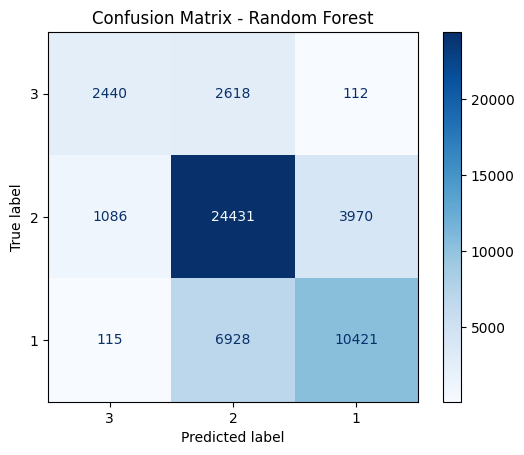

Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.37      0.48      5170
           2       0.67      0.86      0.76     29487
           3       0.72      0.47      0.57     17464

    accuracy                           0.68     52121
   macro avg       0.68      0.57      0.60     52121
weighted avg       0.69      0.68      0.66     52121



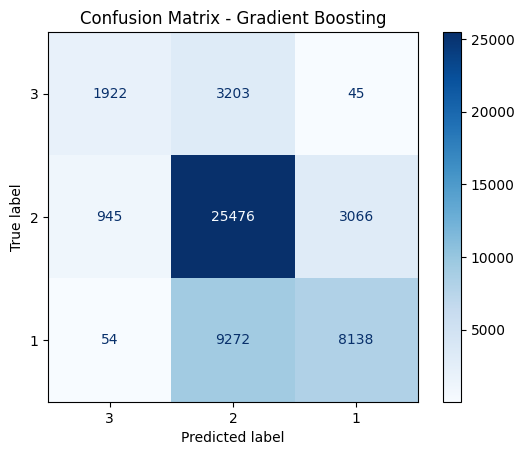

In [ ]:
classifiers = {
    'Random Forest'         : RandomForestClassifier(random_state=42),
    'Gradient Boosting'     : GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors'   : KNeighborsClassifier(),
    'Logistic Regression'   : LogisticRegression(random_state=42)
}

# Add Logistic Regression with cross-validation
logistic_cv = LogisticRegression(random_state=42)
classifiers['Logistic Regression (CV)'] = logistic_cv

# Train and evaluate each model
for name, model in classifiers.items():
    # Special case for Logistic Regression with cross-validation
    if name == 'Logistic Regression (CV)':
        y_pred = cross_val_predict(model, X_train_scaled, y_train, cv=5)
    else:
        # Train the model
        model.fit(X_train_scaled, y_train)
        # Make predictions on the validation set
        y_pred = model.predict(X_val_scaled)

    # Evaluate the model using a classification report
    report = classification_report(y_val, y_pred)
    print(f'{name} - Classification Report:\n{report}')

    # Display confusion matrix using ConfusionMatrixDisplay
    conf_matrix = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=y.unique())
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

In [32]:
# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Make predictions on the validation set
y_pred = model.predict(X_val_scaled)

In [14]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)

print("Classification Report:")
print(classification_report(y_val, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.47      0.55      5170
           2       0.72      0.83      0.77     29487
           3       0.72      0.60      0.65     17464

    accuracy                           0.72     52121
   macro avg       0.70      0.63      0.66     52121
weighted avg       0.71      0.72      0.71     52121



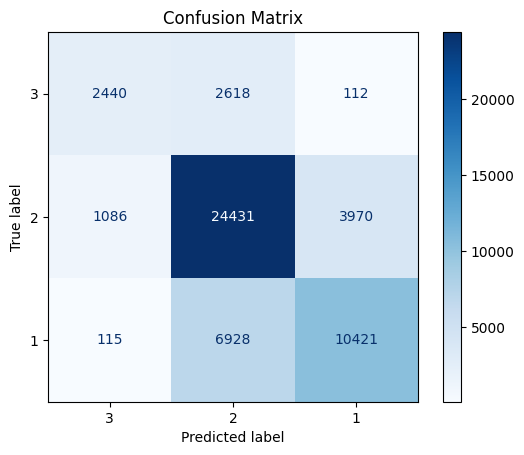

In [15]:
# Display confusion matrix using ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels = y.unique())
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

### Test Predictions

In [16]:
# Make predictions on the test set
X_test_scaled = scaler.transform(test_data.drop('building_id', axis = 1))
test_predictions = model.predict(X_test_scaled)

In [17]:
submission_eathquake = pd.DataFrame({'building_id': test_data['building_id'], 'damage_grade': test_predictions})
sumbit_path = "/content/drive/MyDrive/Colab Notebooks/zindi_competetions/fast_ai_start_up_notebook/data/submission_eathquake.csv"
submission_eathquake.to_csv(sumbit_path, index=False)

submission_eathquake.sample(2)

,building_id,damage_grade
69128,258645,2
26624,73944,2
